In [4]:
import pandas as pd
import os
from google.colab import drive
import shutil

# Step 1: Mount Google Drive

# Step 2: Define the path to the folder containing JSON files
# Replace 'your-folder-path' with the path to the folder in your Drive (e.g., 'My Drive/json_files/')
folder_path = '/content/drive/MyDrive/pads-parkinsons-disease-smartwatch-dataset-1.0.0/pads-parkinsons-disease-smartwatch-dataset-1.0.0/questionnaire'

# Step 3: Initialize an empty list to store data
data_list = []

# Step 4: Process each JSON file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):  # Only process JSON files
        file_path = os.path.join(folder_path, file_name)
        try:
            # Read the JSON file
            with open(file_path, 'r') as f:
                json_data = pd.read_json(f)

            # Extract relevant data
            subject_id = json_data['subject_id']
            items = json_data['item']

            # Convert questions and answers into a dictionary
            record = {'id': subject_id}
            for item in items:
                question = item['text']
                answer = item['answer']
                record[question] = answer

            # Append the record to the list
            data_list.append(record)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Step 5: Create a DataFrame from the list
if data_list:
    combined_df = pd.DataFrame(data_list)

    # Save the DataFrame to a CSV file
    csv_file_name = "combined_output.csv"
    combined_df.to_csv(csv_file_name, index=False)

    # Step 6: Move the CSV file to Drive for easy access
    output_path = os.path.join(folder_path, csv_file_name)
    shutil.move(csv_file_name, output_path)

    print(f"CSV file '{csv_file_name}' has been created and saved to your Drive folder.")
else:
    print("No valid JSON files were processed.")


CSV file 'combined_output.csv' has been created and saved to your Drive folder.


In [6]:
import pandas as pd

# Path to the CSV file in your Drive
csv_file_path = '/content/drive/MyDrive/pads-parkinsons-disease-smartwatch-dataset-1.0.0/pads-parkinsons-disease-smartwatch-dataset-1.0.0/questionnaire/combined_output.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


                                                    id  \
0    0     7\n1     7\n2     7\n3     7\n4     7\n5...   
1    0     1\n1     1\n2     1\n3     1\n4     1\n5...   
2    0     8\n1     8\n2     8\n3     8\n4     8\n5...   
3    0     6\n1     6\n2     6\n3     6\n4     6\n5...   
4    0     3\n1     3\n2     3\n3     3\n4     3\n5...   
..                                                 ...   
464  0     464\n1     464\n2     464\n3     464\n4 ...   
465  0     467\n1     467\n2     467\n3     467\n4 ...   
466  0     461\n1     461\n2     461\n3     461\n4 ...   
467  0     460\n1     460\n2     460\n3     460\n4 ...   
468  0     462\n1     462\n2     462\n3     462\n4 ...   

     Dribbling of saliva during the daytime  \
0                                      True   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
..                   

In [3]:
import pandas as pd

# Load the CSV file
file_path = '../Dataset/patients+question_data.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Extract the second part of the id column (assuming space-separated values)
df['id'] = df['id'].astype(str).str.split().str[1]

# Convert the id column to integer for proper sorting (optional)
df['id'] = df['id'].astype(int)

# Save the updated CSV file
df.to_csv('updated_file.csv', index=False)

print("ID column updated successfully.")


ID column updated successfully.


In [7]:
import pandas as pd

# Load the CSV file
file_path = '../Dataset/patients+question_data.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Extract the second part of the id column (assuming space-separated values)
df['id'] = df['id'].astype(str).str.split().str[1].astype(int)

# Sort the DataFrame by the updated id column
df = df.sort_values(by='id').reset_index(drop=True)

# Save the updated and sorted CSV file
df.to_csv('sorted_file.csv', index=False)

print("ID column updated and sorted successfully.")


ID column updated and sorted successfully.


In [9]:
import pandas as pd

# Load the first file
file1_path = '../Notebooks/patients_questions_data.csv'  # Replace with actual file path
df1 = pd.read_csv(file1_path)

# Load the second file
file2_path = '../Dataset/preprocessed/file_list.csv'  # Replace with actual file path
df2 = pd.read_csv(file2_path)

# Select columns from df2 (from 5th column till the end)
df2_selected = df2.iloc[:, 4:]  # 4 because indexing starts from 0 (5th column = index 4)

# Insert df2_selected columns between the 1st and 2nd column of df1
df_combined = pd.concat([df1.iloc[:, :1], df2_selected, df1.iloc[:, 1:]], axis=1)

# Save the combined dataset
df_combined.to_csv('combined_file.csv', index=False)

print("Files combined successfully.")


Files combined successfully.


In [3]:
import pandas as pd
file_path3 = '../Dataset/cleaned_data.csv'  # Replace with actual file path
df3 = pd.read_csv(file_path3)

In [5]:
# Modify the label column: Convert 1 and 2 to 1
df3['label'] = df3['label'].apply(lambda x: 1 if x in [1, 2] else x)

# Save the modified dataset
output_file_path3 = '../Dataset/Healthy_Unhealthy.csv'  # Replace with desired output path
df3.to_csv(output_file_path3, index=False)

print("Modified CSV file saved successfully.")

Modified CSV file saved successfully.


In [10]:
file_path = '../Dataset/cleaned_data.csv'  # Replace with actual file path
df = pd.read_csv(file_path)

# Remove all rows where label is 0
df = df[df['label'] != 0]

# Save the filtered dataset
output_file_path = '../Dataset/PD_vs_DD.csv'  # Replace with desired output path
df.to_csv(output_file_path, index=False)

print("Filtered CSV file saved successfully.")

Filtered CSV file saved successfully.


In [7]:
# Load the dataset
file_path = '../Dataset/Healthy_Unhealthy.csv'  # Replace with actual file path
df = pd.read_csv(file_path)

# Move label column to the last position
df = df[[col for col in df.columns if col != 'label'] + ['label']]

# Save the updated dataset in the same file
df.to_csv(file_path, index=False)

print("CSV file updated successfully with label column at the end.")

CSV file updated successfully with label column at the end.


In [11]:
# Load the dataset
file_path = '../Dataset/PD_vs_DD.csv'  # Replace with actual file path
df = pd.read_csv(file_path)

# Move label column to the last position
df = df[[col for col in df.columns if col != 'label'] + ['label']]

# Save the updated dataset in the same file
df.to_csv(file_path, index=False)

print("CSV file updated successfully with label column at the end.")

CSV file updated successfully with label column at the end.


In [12]:
import pandas as pd

# Load the CSV file
file_path = '../Dataset/PD_vs_DD.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Check the name of the last column
last_column = df.columns[-1]
print(f"Last column name: {last_column}")

# Replace all values of 2 with 0 in the last column
df[last_column] = df[last_column].replace(2, 0)

# Save the updated DataFrame back to a CSV file
output_file_path = '../Dataset/PD_vs_DD.csv'  # Replace with the desired output file path
df.to_csv(output_file_path, index=False)

print(f"Updated CSV saved to: {output_file_path}")

Last column name: label
Updated CSV saved to: ../Dataset/PD_vs_DD.csv


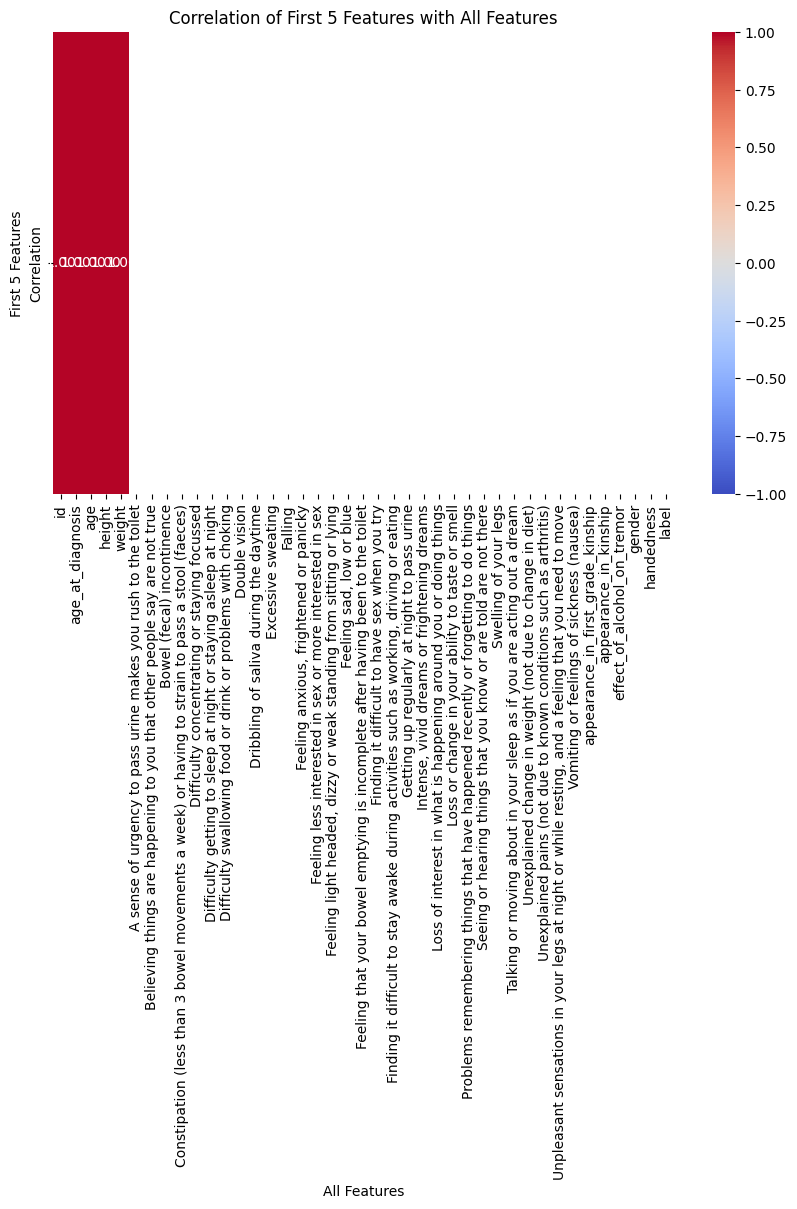

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('../Dataset/cleaned_data.csv')

# Select the first 5 features and all features
first_5_features = df.iloc[:, :5]  # First 5 features
all_features = df  # All features

# Compute the correlation matrix between the first 5 features and all features
corr_matrix = first_5_features.corrwith(all_features, axis=0)

# Convert the result to a DataFrame for easier plotting
corr_matrix = pd.DataFrame(corr_matrix, columns=['Correlation'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.T, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of First 5 Features with All Features')
plt.xlabel('All Features')
plt.ylabel('First 5 Features')
plt.show()

In [2]:
import os
import json
import pandas as pd
import numpy as np

# Directories for JSON and timeseries files
json_dir = '../Dataset/movement'  # adjust as needed
timeseries_dir = '../Dataset/movement/timeseries'  # adjust as needed

patient_data = {}

# Loop through each JSON file (each represents a patient)
for json_file in os.listdir(json_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_dir, json_file)
        with open(json_path, 'r') as f:
            data = json.load(f)
        
        patient_id = data.get('subject_id', os.path.splitext(json_file)[0])
        task_metrics = {}

        # Loop through each task/session for the patient
        for session in data.get('session', []):
            task_name = session.get('record_name', 'Unknown_Task')
            file_std_values = []  # to collect mean std for each record file

            for record in session.get('records', []):
                file_name = record.get('file_name')
                if file_name:
                    # If file_name starts with "timeseries/", remove that prefix.
                    if file_name.startswith("timeseries/"):
                        file_name = file_name[len("timeseries/"):]
                    txt_path = os.path.join(timeseries_dir, file_name)
                    
                    try:
                        # Read the time series file (assuming comma-separated values, no header)
                        df = pd.read_csv(txt_path, header=None)
                        # Skip the first column (Time) and compute std for sensor columns
                        sensor_stds = df.iloc[:, 1:7].std()
                        mean_std = sensor_stds.mean()
                        file_std_values.append(mean_std)
                    except Exception as e:
                        print(f"Error reading {txt_path}: {e}")
            
            # Average across records (if more than one exists for this task)
            if file_std_values:
                task_metrics[task_name] = np.mean(file_std_values)
        
        patient_data[patient_id] = task_metrics

# Create a DataFrame where rows are patients and columns are tasks
df_patients = pd.DataFrame.from_dict(patient_data, orient='index')

# Optionally sort columns (tasks) alphabetically
df_patients = df_patients.reindex(sorted(df_patients.columns), axis=1)

# Save the resulting DataFrame to CSV
df_patients.to_csv('patient_task_std_means.csv', index=True)

print("CSV file created with each row representing a patient and each column a task.")


CSV file created with each row representing a patient and each column a task.


In [3]:
import os
import json
import pandas as pd
import numpy as np

# Directories for JSON files and timeseries files (adjust as needed)
json_dir = '../Dataset/movement'         # Folder with JSON files for each patient
timeseries_dir = '../Dataset/movement/timeseries'  # Folder containing the txt files

# Sensor names corresponding to columns 1-6 (column 0 is assumed to be Time)
sensor_names = [
    "Accelerometer_X",
    "Accelerometer_Y",
    "Accelerometer_Z",
    "Gyroscope_X",
    "Gyroscope_Y",
    "Gyroscope_Z"
]

# Dictionary to hold each patient's sensor standard deviations per task.
# Structure: { patient_id: { "Task1_Accelerometer_X": value, "Task1_Accelerometer_Y": value, ..., "Task11_Gyroscope_Z": value } }
patient_data = {}

# Loop through each JSON file (each representing one patient)
for json_file in os.listdir(json_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_dir, json_file)
        with open(json_path, 'r') as f:
            data = json.load(f)
        
        # Use the subject_id from JSON or fallback to file name (without extension)
        patient_id = data.get('subject_id', os.path.splitext(json_file)[0])
        patient_record = {}  # Will hold key: column name, value: sensor std value

        # Each "session" in the JSON represents a task
        for session in data.get('session', []):
            task_name = session.get('record_name', 'Unknown_Task')
            sensor_std_list = []  # To collect the sensor std arrays from each record of this task
            
            # Process each record in the session (for example, LeftWrist and RightWrist)
            for record in session.get('records', []):
                file_name = record.get('file_name')
                if file_name:
                    # Remove any redundant folder prefix if needed
                    if file_name.startswith("timeseries/"):
                        file_name = file_name[len("timeseries/"):]
                    txt_path = os.path.join(timeseries_dir, file_name)
                    
                    try:
                        # Read the txt file (assuming comma-separated values, no header)
                        df = pd.read_csv(txt_path, header=None)
                        # Assume columns:
                        #   0: Time, 1: Accelerometer_X, 2: Accelerometer_Y, 3: Accelerometer_Z,
                        #   4: Gyroscope_X, 5: Gyroscope_Y, 6: Gyroscope_Z
                        # Compute the standard deviation for the 6 sensor columns
                        sensor_stds = df.iloc[:, 1:7].std().values  # This returns an array of 6 values.
                        sensor_std_list.append(sensor_stds)
                    except Exception as e:
                        print(f"Error reading {txt_path}: {e}")
            
            # If at least one record was read for this task, combine the sensor std values.
            if sensor_std_list:
                # If multiple records exist (e.g., LeftWrist and RightWrist), average the std values for each sensor
                sensor_std_avg = np.mean(sensor_std_list, axis=0)
                # Create separate columns for each sensor for this task.
                for i, sensor in enumerate(sensor_names):
                    col_name = f"{task_name}_{sensor}"
                    patient_record[col_name] = sensor_std_avg[i]
                    
        patient_data[patient_id] = patient_record

# Convert the dictionary to a DataFrame where each row represents a patient
df_sensors = pd.DataFrame.from_dict(patient_data, orient='index')

# Optional: sort columns (alphabetically or in a specific order)
df_sensors = df_sensors.reindex(sorted(df_sensors.columns), axis=1)

# Save the DataFrame to a CSV file
df_sensors.to_csv('patient_task_sensor_std_66.csv', index=True)

print("CSV file with 66 columns (6 per task) has been created.")


CSV file with 66 columns (6 per task) has been created.


In [4]:
import os
import json
import pandas as pd
import numpy as np

# Directories for JSON files and timeseries files (adjust these paths as needed)
json_dir = '../Dataset/movement'         # Folder containing patient JSON files
timeseries_dir = '../Dataset/movement/timeseries'  # Folder containing the .txt time series files

# Dictionary to store patient results.
# Structure: { patient_id: { "TaskName_acc": value, "TaskName_gyro": value, ... } }
patient_data = {}

# Loop through each JSON file (each representing one patient)
for json_file in os.listdir(json_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_dir, json_file)
        with open(json_path, 'r') as f:
            data = json.load(f)
        
        # Use subject_id from JSON, or fall back to the file name (without extension)
        patient_id = data.get('subject_id', os.path.splitext(json_file)[0])
        patient_record = {}

        # Each "session" represents a task (for example, "Relaxed", "HoldWeight", etc.)
        for session in data.get('session', []):
            task_name = session.get('record_name', 'Unknown_Task')
            acc_values = []   # To collect accelerometer mean std values from each record
            gyro_values = []  # To collect gyroscope mean std values from each record

            # Loop through each record in the session (e.g., LeftWrist, RightWrist)
            for record in session.get('records', []):
                file_name = record.get('file_name')
                if file_name:
                    # Remove the "timeseries/" prefix if present, since our directory already points there.
                    if file_name.startswith("timeseries/"):
                        file_name = file_name[len("timeseries/"):]
                    txt_path = os.path.join(timeseries_dir, file_name)
                    
                    try:
                        # Read the text file (assuming comma-separated values and no header)
                        df = pd.read_csv(txt_path, header=None)
                        # Assumed column order:
                        # Column 0: Time
                        # Columns 1-3: Accelerometer_X, Accelerometer_Y, Accelerometer_Z
                        # Columns 4-6: Gyroscope_X, Gyroscope_Y, Gyroscope_Z
                        
                        # Compute the standard deviation for accelerometer columns and then take their mean
                        acc_std = df.iloc[:, 1:4].std()
                        acc_mean_std = acc_std.mean()
                        
                        # Compute the standard deviation for gyroscope columns and then take their mean
                        gyro_std = df.iloc[:, 4:7].std()
                        gyro_mean_std = gyro_std.mean()
                        
                        # Append these values
                        acc_values.append(acc_mean_std)
                        gyro_values.append(gyro_mean_std)
                    except Exception as e:
                        print(f"Error reading {txt_path}: {e}")
            
            # If at least one record was successfully read for this task,
            # compute the average value across records for the task.
            if acc_values and gyro_values:
                task_acc = np.mean(acc_values)
                task_gyro = np.mean(gyro_values)
                # Create two columns for this task: one for accelerometer and one for gyroscope.
                patient_record[f"{task_name}_acc"] = task_acc
                patient_record[f"{task_name}_gyro"] = task_gyro

        # Save this patient's record in our dictionary
        patient_data[patient_id] = patient_record

# Create a DataFrame where each row represents a patient and each column represents a task's acc or gyro value.
df_tasks = pd.DataFrame.from_dict(patient_data, orient='index')

# (Optional) Sort the columns alphabetically or as desired.
df_tasks = df_tasks.reindex(sorted(df_tasks.columns), axis=1)

# Save the DataFrame to a CSV file.
df_tasks.to_csv('patient_task_acc_gyro_std_22.csv', index=True)

print("CSV file with 22 columns (2 per task) has been created.")


CSV file with 22 columns (2 per task) has been created.


In [7]:
import pandas as pd

# Load the cleaned_data.csv, assuming it has columns "subject_id" and "label"
df_cleaned = pd.read_csv('../Dataset/cleaned_data.csv', usecols=['id', 'label'])
df_cleaned.set_index('id', inplace=True)

# Load your previously generated CSV files, with patient_id as the index
df_22 = pd.read_csv('patient_task_acc_gyro_std_22.csv', index_col=0)
df_66 = pd.read_csv('patient_task_sensor_std_66.csv', index_col=0)
df_means = pd.read_csv('patient_task_std_means.csv', index_col=0)

# Merge the label column with each DataFrame based on the patient id (the index)
df_22 = df_22.join(df_cleaned, how='left')
df_66 = df_66.join(df_cleaned, how='left')
df_means = df_means.join(df_cleaned, how='left')

# Save the updated DataFrames to new CSV files
df_22.to_csv('patient_task_acc_gyro_std_22_with_label.csv')
df_66.to_csv('patient_task_sensor_std_66_with_label.csv')
df_means.to_csv('patient_task_std_means_with_label.csv')


In [8]:
import pandas as pd

csv_files = [
    'patient_task_acc_gyro_std_22_with_label.csv',
    'patient_task_sensor_std_66_with_label.csv',
    'patient_task_std_means_with_label.csv'
]

for file in csv_files:
    # Load the CSV with the first column as the index
    df = pd.read_csv(file, index_col=0)
    # Re-save the file, setting the index label to "id"
    df.to_csv(file, index_label='id')
    print(f"Updated {file} with index label 'id'.")


Updated patient_task_acc_gyro_std_22_with_label.csv with index label 'id'.
Updated patient_task_sensor_std_66_with_label.csv with index label 'id'.
Updated patient_task_std_means_with_label.csv with index label 'id'.


In [13]:
import pandas as pd

# Load the original CSV file
df = pd.read_csv('patient_task_sensor_std_66_with_label.csv')

# Modify the 'label' column
df['label'] = df['label'].apply(lambda x: 0 if x == 0 else 1)

# Save the updated DataFrame to a new CSV file
df.to_csv('Healthy_vs_Unhealthy_acc_gyro_std_66.csv', index=False)

In [14]:
import pandas as pd

# Load the original CSV file
df = pd.read_csv('patient_task_sensor_std_66_with_label.csv')

# Remove rows where label value is 0
df = df[df['label'] != 0]

# Change label value 2 to 0
df['label'] = df['label'].apply(lambda x: 0 if x == 2 else x)

# Save the updated DataFrame to a new CSV file
df.to_csv('PD_vs_DD_acc_gyro_std_66.csv', index=False)
